Class 11: Linear Regression with Gradient Decent

Objectives: 
1. Define the task
2. make a Random Linear prediction


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import sys
from tqdm import tqdm
from scipy.stats import entropy

import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
ROOT_DIR = "/home/dipu/Desktop/BongoDev/MachineLearning"
DATA_DIR = os.path.join(ROOT_DIR, "data")
DATASET_PATH = os.path.join(DATA_DIR, "Housing.csv")

housing_dataset = pd.read_csv(DATASET_PATH)
housing_dataset.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [7]:
housing_dataset.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [8]:
housing_dataset = housing_dataset[['area', 'price']]
housing_dataset.head()

,area,price
0,7420,13300000
1,8960,12250000
2,9960,12250000
3,7500,12215000
4,7420,11410000


In [9]:
"""Standardization"""
mean = housing_dataset.mean()
print(mean)
std = housing_dataset.std()
print(std)
housing_dataset = (housing_dataset - mean) / std
housing_dataset.head()

area     5.150541e+03
price    4.766729e+06
dtype: float64
area     2.170141e+03
price    1.870440e+06
dtype: float64


,area,price
0,1.045766,4.562174
1,1.755397,4.000809
2,2.216196,4.000809
3,1.082630,3.982096
4,1.045766,3.551716


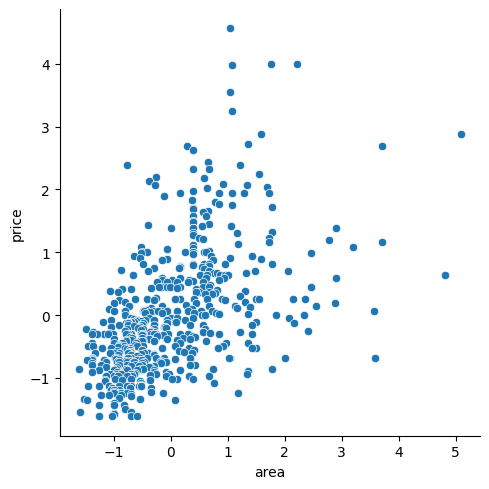

In [16]:
sns.relplot(x='area', y='price', data=housing_dataset)

In [17]:
"""

Random Initialization of Prediction Line

y = mx + c
predict y = wx + b

w => weight
b => bias


"""

def get_house_price(x, w, b):
    return w*x + b

In [24]:
w = np.random.randint(100, 200)
b = np.random.randint(100, 200)

print(w, b)

172 129


In [25]:
housing_dataset['predicted_price'] = get_house_price(housing_dataset['area'], w, b)
housing_dataset.head()

,area,price,predicted_price
0,1.045766,4.562174,308.871674
1,1.755397,4.000809,430.928258
2,2.216196,4.000809,510.185780
3,1.082630,3.982096,315.212276
4,1.045766,3.551716,308.871674


In [26]:
sns.displot(
    data=__,
    x='Price',
    hue = "Type",
    kind = "hist",
    stat = "probability",
    kde = True,
    col = 'Type',
    fill = True,
)

TypeError: Data source must be a DataFrame or Mapping, not <class 'seaborn.axisgrid.FacetGrid'>.

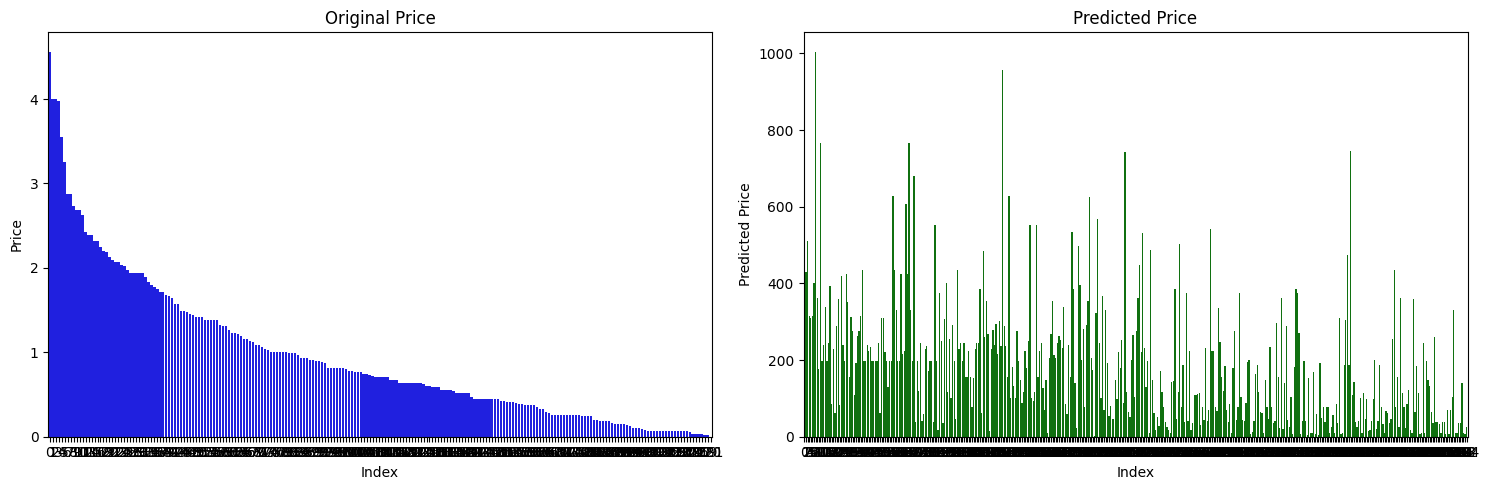

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Filter out negative values for original price
positive_prices = housing_dataset[housing_dataset['price'] > 0]
sns.barplot(x=positive_prices.index, y=positive_prices['price'], ax=axes[0], color='blue')
axes[0].set_title('Original Price')
axes[0].set_xlabel('Index')
axes[0].set_ylabel('Price')

# Filter out negative values for predicted price
positive_predicted_prices = housing_dataset[housing_dataset['predicted_price'] > 0]
sns.barplot(x=positive_predicted_prices.index, y=positive_predicted_prices['predicted_price'], ax=axes[1], color='green')
axes[1].set_title('Predicted Price')
axes[1].set_xlabel('Index')
axes[1].set_ylabel('Predicted Price')

plt.tight_layout()
plt.show()

Gradient Decent Workflow

In [33]:
"""Cost Function"""
def cost_function(x, y, w, b):
    y_pred = get_house_price(x, w, b)

    return np.mean((y - y_pred) ** 2) / 2

In [37]:
X = housing_dataset['area']
y_true = housing_dataset['price']

loss = cost_function(X, y_true, w, b)
print(loss)

22993.83541348667


In [39]:
weights = np.linspace(-100, 100, 100)
biases = np.linspace(-100, 100, 100)
weights_mesh, biases_mesh = np.meshgrid(weights, biases)
losses =[]
for w in tqdm(np.ravel(weights_mesh[0])):
    for b in np.ravel(biases_mesh[0]):
        loss = cost_function(X, y_true, w, b)
        losses.append(loss)

losses_mesh = np.array(losses)
losses_mesh = losses_mesh.reshape(weights_mesh.shape)

100%|██████████| 100/100 [00:04<00:00, 20.30it/s]


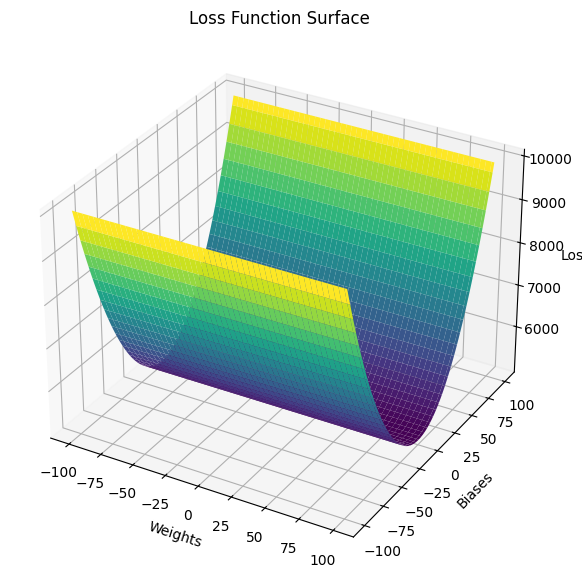

In [40]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(weights_mesh, biases_mesh, losses_mesh, cmap='viridis')

ax.set_xlabel('Weights')
ax.set_ylabel('Biases')
ax.set_zlabel('Loss')
ax.set_title('Loss Function Surface')

plt.show()

In [41]:
def compute_gradients(x, y_true, w, b):
    delta = 1e-5
    cost_1 = cost_function(x, y_true, w + delta, b)
    cost_2 = cost_function(x, y_true, w - delta, b)
    dw = (cost_1 - cost_2) / delta
    db = (cost_1 - cost_2) / delta

    return dw, db

In [43]:
print(w, b)

100.0 -100.0


In [44]:
loss = cost_function(X, y_true, w, b)
print(loss)

9937.823384201236


In [45]:
dw, db = compute_gradients(X, y_true, w, b)
print(dw, db)

198.56299986713563 198.56299986713563


In [50]:
learning_rate = 0.003
w -=  learning_rate * dw
b -=  learning_rate * db

In [ ]:
for epoch in range(10000):
    loss = cost_function(X, y_true, w, b)
    dw, db = compute_gradients(X, y_true, w, b)
    w -=  learning_rate * dw
    b -=  learning_rate * db

    if i % 1000 == 0:
        print(f'Iteration: {i}, Loss: {loss}')



Iteration: 0, Loss: 19893.29995762955
Iteration: 1000, Loss: 19893.29995762955
Iteration: 2000, Loss: 19893.29995762955
Iteration: 3000, Loss: 19893.29995762955
Iteration: 4000, Loss: 19893.29995762955
Iteration: 5000, Loss: 19893.29995762955
Iteration: 6000, Loss: 19893.29995762955
Iteration: 7000, Loss: 19893.29995762955
Iteration: 8000, Loss: 19893.29995762955
Iteration: 9000, Loss: 19893.29995762955


In [52]:
print(w, b)

0.535996941471268 -199.46400305852876


In [53]:
housing_dataset['predicted_price'] = get_house_price(housing_dataset['area'], w, b)
housing_dataset.head()

,area,price,predicted_price
0,1.045766,4.562174,-198.903476
1,1.755397,4.000809,-198.523116
2,2.216196,4.000809,-198.276129
3,1.082630,3.982096,-198.883717
4,1.045766,3.551716,-198.903476


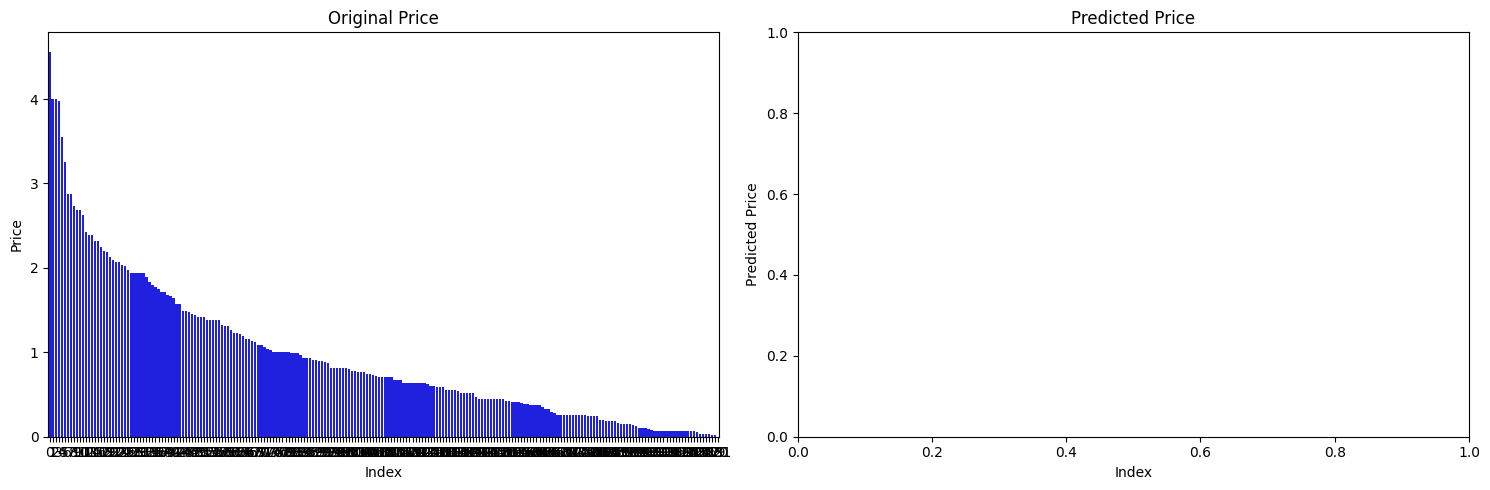

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Filter out negative values for original price
positive_prices = housing_dataset[housing_dataset['price'] > 0]
sns.barplot(x=positive_prices.index, y=positive_prices['price'], ax=axes[0], color='blue')
axes[0].set_title('Original Price')
axes[0].set_xlabel('Index')
axes[0].set_ylabel('Price')

# Filter out negative values for predicted price
positive_predicted_prices = housing_dataset[housing_dataset['predicted_price'] > 0]
sns.barplot(x=positive_predicted_prices.index, y=positive_predicted_prices['predicted_price'], ax=axes[1], color='green')
axes[1].set_title('Predicted Price')
axes[1].set_xlabel('Index')
axes[1].set_ylabel('Predicted Price')

plt.tight_layout()
plt.show()